# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [195]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
# Printing the first 5 rows of the data set
print(crops.head())

# Determining the number of unique crops
num_crops = crops['crop'].nunique()
print("Number of unique crops: ", num_crops)

# Checking for missing values
print(crops.isna().sum().sort_values())

# Verifying that the features are numeric
numerical_columns = crops.select_dtypes(include=['number']).columns
print(numerical_columns)

# Checking for crop types
crop_types = crops['crop'].unique()
print(crop_types)

le = LabelEncoder()
crops['crop_numeric'] = le.fit_transform(crops['crop'])

# print(crops.head())

# Splitting the features and target variable    
X = pd.DataFrame(crops[['N', 'P', 'K', 'ph']].values)  #features
y = pd.DataFrame(crops['crop_numeric'].values) #target


# # Using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
Number of unique crops:  22
N       0
P       0
K       0
ph      0
crop    0
dtype: int64
Index(['N', 'P', 'K', 'ph'], dtype='object')
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


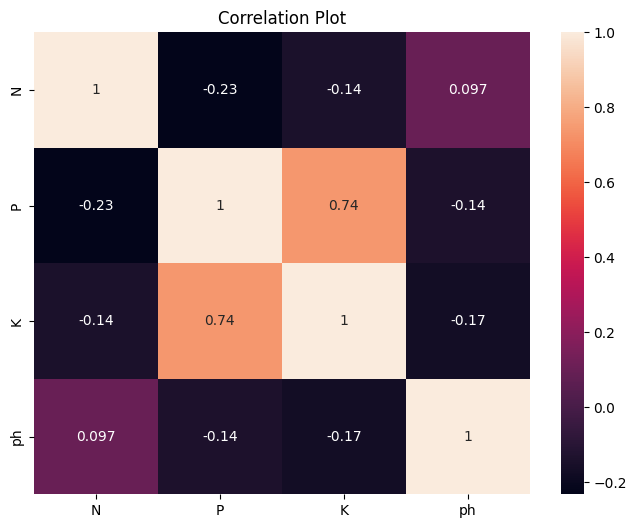

In [196]:
# Looping through features
for feature in ["N", "P", "K", "ph"]:
    X = crops[[feature]].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    log_reg.fit(X_train, y_train) 
    y_pred = log_reg.predict(X_test) 

    # Evaluating Feature Performance
    feature_performance = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {feature_performance}")

# Estimating feature correlation
correlation_plot = crops[["N", "P", "K", "ph"]].corr()

# Visualizing the correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_plot, annot=True)
plt.title('Correlation Plot')
plt.show()

In [197]:
# Final features list
final_features = ["N", "K", "ph"]

# Re-splitting the features and target variable
X = pd.DataFrame(crops[final_features].values)  #features
y = pd.DataFrame(crops['crop_numeric'].values)  #target

# Using train_test_split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluating the model
log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Model performance
model_performance = f1_score(y_test, y_pred, average="weighted")
print(f"Model Performance: {model_performance}")

Model Performance: 0.558010495235685
